In [2]:
pip install spektral

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 3.6 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')
%cd /content/gdrive/My\ Drive

Mounted at /content/gdrive/
/content/gdrive/My Drive


In [5]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import signal
import scipy.io

In [4]:
data = np.load("finaldata1.npy")
label = np.load("finallable1.npy")
#data2=np.concatenate(([data[0:2000,0:64,0:250],data[0:2000,0:64,250:500]]), axis=0)
data2=np.concatenate(([data[0:2000,0:64,0:100],data[0:2000,0:64,100:200],data[0:2000,0:64,200:300],data[0:2000,0:64,300:400],data[0:2000,0:64,400:500]]), axis=0)
label2=np.concatenate(([label,label,label,label,label]), axis=0)
print(np.shape(data2))
print(np.shape(label2))
data2 = np.moveaxis(data2, 1, 2)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(data2.reshape(-1, data2.shape[-1])).reshape(data2.shape)



(10000, 64, 100)
(10000,)


In [5]:
import numpy as np
import networkx as nx
import scipy.sparse as sp
# Define the 10-20 system layout for a 64-channel EEG system
channels = [
    "FP1", "FPz", "FP2", "F7", "F3", "Fz", "F4", "F8","FC5", "FC1", "FC2", "FC6", "A1",
    "T7", "C3", "Cz", "C4", "T8","A2","CP5", "CP1", "CP2" , "CP6","P7", "P3", "Pz",
    "P4", "P8", "POz","O1", "Oz", "O2", "AF7", "AF3", "AF4", "AF8","F5","F1","F2","F6",
    "FC3", "FCz", "FC4", "C5", "C1", "C2", "C6", "CP3", "CPz", "CP4", "P5", "P1", "P2", "P6", "PO5", "PO3", "PO4", "PO6",
    "FT7", "FT8", "TP7", "TP8", "PO7", "PO8"
]

# Define connections between channels
connections = [
    ("FPz", "FP1"), ("FPz", "FP2"),("FP1", "AF7"),("FP1", "AF3"), ("FP2", "AF4"), ("FP2", "AF8"),
    ("AF7", "F7"), ("AF7", "AF3"), ("AF3", "F3"),("AF4", "F4"), ("AF8", "AF4"), ("AF8", "F8"),
    ("F7", "F5"), ("F7", "FT7"), ("F5", "F3"), ("F5", "FC5"), ("F3", "F1"), ("F3", "FC3"),
    ("F1", "Fz"), ("F1", "FC1"), ("Fz", "FCz"), ("Fz", "F2"), ("F2", "F4"), ("F2", "FC2"),
    ("F4", "F6"), ("F4", "FC4"), ("F6", "F8"),("F6", "FC6"), ("F8", "FT8"), ("FT7", "FC5"),
    ("F7", "T7"), ("FC5", "C5"), ("FC5", "FC3"),("FC3", "FC1"), ("FC3", "C3"), ("FC1", "C1"),
    ("FC1", "FCz"), ("FCz", "Cz"), ("FCz", "FC2"),("FC2", "FC4"), ("FC2", "C2"), ("FC4", "C4"),
    ("FC4", "FC6"), ("FC6", "C6"), ("FC6", "FT8"),("FT8", "T8"), ("T7", "TP7"), ("T7", "C5"),
    ("C5", "CP5"), ("C5", "C3"), ("C3", "CP3"),("C3", "C1"), ("C1", "CP1"), ("C1", "Cz"),
    ("Cz", "CPz"), ("Cz", "C2"), ("C2", "CP2"),("C2", "C4"), ("C4", "CP4"), ("C4", "C6"),
    ("C6", "CP6"), ("C6", "T8"), ("T8", "TP8"),("TP7", "P7"), ("TP7", "CP5"), ("CP5", "P5"),
    ("CP5", "CP3"), ("CP3", "P3"), ("CP3", "CP1"),("CP1", "P1"), ("CP1", "CPz"), ("CPz", "Pz"),
    ("CPz", "CP2"), ("CP2", "P2"), ("CP2", "CP4"),("CP4", "P4"), ("CP4", "CP6"), ("CP6", "P6"),
    ("CP6", "TP8"), ("TP8", "P8"), ("P7", "PO7"),("P7", "P5"), ("P5", "PO5"), ("P5", "P3"),
    ("P3", "PO3"), ("P3", "P1"), ("P1", "Pz"),("Pz", "POz"), ("Pz", "P2"), ("P2", "P4"),
    ("P4", "PO4"), ("P4", "P6"), ("P6", "PO6"),("P6", "P8"), ("P8", "PO8"), ("PO7", "PO5"),
    ("PO7", "O1"), ("PO3", "O1"), ("PO3", "PO5"),("PO3", "POz"), ("POz", "PO4"), ("POz", "Oz"),
    ("PO4", "PO6"), ("PO4", "O2"), ("PO6", "PO8"),("PO8", "O2"), ("O1", "Oz"), ("Oz", "O2"),


    # Add more connections as needed...
]

# Create an empty adjacency matrix
adj_matrix = np.zeros((len(channels), len(channels)), dtype=int)

# Set connections in the adjacency matrix
for connection in connections:
    idx1 = channels.index(connection[0])
    idx2 = channels.index(connection[1])
    adj_matrix[idx1, idx2] = 1
    adj_matrix[idx2, idx1] = 1  # Assuming undirected connections

# Print the adjacency matrix (optional)
print("Adjacency matrix:")
print(adj_matrix)

# Convert adjacency matrix to edge list
adj = sp.coo_matrix(adj_matrix, dtype= 'float32')
print(adj)


Adjacency matrix:
[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
  (0, 1)	1.0
  (0, 32)	1.0
  (0, 33)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (2, 1)	1.0
  (2, 34)	1.0
  (2, 35)	1.0
  (3, 13)	1.0
  (3, 32)	1.0
  (3, 36)	1.0
  (3, 58)	1.0
  (4, 33)	1.0
  (4, 36)	1.0
  (4, 37)	1.0
  (4, 40)	1.0
  (5, 37)	1.0
  (5, 38)	1.0
  (5, 41)	1.0
  (6, 34)	1.0
  (6, 38)	1.0
  (6, 39)	1.0
  (6, 42)	1.0
  (7, 35)	1.0
  (7, 39)	1.0
  :	:
  (55, 54)	1.0
  (56, 26)	1.0
  (56, 28)	1.0
  (56, 31)	1.0
  (56, 57)	1.0
  (57, 53)	1.0
  (57, 56)	1.0
  (57, 63)	1.0
  (58, 3)	1.0
  (58, 8)	1.0
  (59, 7)	1.0
  (59, 11)	1.0
  (59, 17)	1.0
  (60, 13)	1.0
  (60, 19)	1.0
  (60, 23)	1.0
  (61, 17)	1.0
  (61, 22)	1.0
  (61, 27)	1.0
  (62, 23)	1.0
  (62, 29)	1.0
  (62, 54)	1.0
  (63, 27)	1.0
  (63, 31)	1.0
  (63, 57)	1.0


In [6]:
from spektral.data import Graph, Dataset, BatchLoader, SingleLoader

class EEGDataset(Dataset):
    def __init__(self, eeg_data, labels, adj, **kwargs):
        self.eeg_data = eeg_data
        self.labels = labels
        self.adj = adj
        super().__init__(**kwargs)

    def read(self):
        graphs = []
        for i in range(len(self.eeg_data)):
            x = self.eeg_data[i].T
            y = self.labels[i]
            graphs.append(Graph(x=x, a=self.adj, y=y))
        return graphs

# Example labels for your data
# Create the dataset
dataset = EEGDataset(X_train, label2, adj)
batch_size = 128
idxs = np.random.permutation(len(dataset))
split_va, split_te = int(0.8 * len(dataset)), int(0.9 * len(dataset))
idx_tr, idx_va, idx_te = np.split(idxs, [split_va, split_te])
dataset_tr = dataset[idx_tr]
dataset_va = dataset[idx_va]
dataset_te = dataset[idx_te]


loader_tr = BatchLoader(dataset_tr, batch_size=batch_size, shuffle=False)
loader_va = BatchLoader(dataset_va, batch_size=batch_size, shuffle=False)
loader_te = BatchLoader(dataset_te, batch_size=1000, epochs=None, shuffle=False)

In [7]:
yt = []
for j in range (1000):
    yt.append(loader_te.dataset[j].y)
print(np.shape(yt))


(1000,)


In [8]:
modelencoder1 = tf.keras.models.load_model('frequency_Pre_LN1000')

transformerF = tf.keras.models.Model(
   inputs=modelencoder1.inputs,
   outputs=modelencoder1.get_layer(name="tf.__operators__.add_7").output,
)

modelencoder2 = tf.keras.models.load_model('time_Pre_LN_1000')

transformerT = tf.keras.models.Model(
   inputs=modelencoder2.inputs,
   outputs=modelencoder2.get_layer(name="tf.__operators__.add_7").output,
)

for layer in transformerT.layers:
    layer.trainable = False

for layer in transformerF.layers:
    layer.trainable = False

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers
from spektral.layers import GCNConv, GlobalSumPool

def build_model(hidden_channels, num_classes, transformerT, transformerF, input_shape, adj_shape, dropout_rate=0.5, l2_reg=5e-4):

    # Functional API for the non-sequential part
    x_input = tf.keras.layers.Input(shape=input_shape)
    adj_input = tf.keras.layers.Input(shape=adj_shape)

    xt = transformerT(tf.transpose(x_input, perm=[0, 2, 1]))
    xf = transformerF(tf.transpose(x_input, perm=[0, 2, 1]))

    xt = GCNConv(hidden_channels, activation='relu', kernel_regularizer=regularizers.l1(l2_reg))([tf.transpose(xt, perm=[0, 2, 1]), adj_input])
    xt = GCNConv(hidden_channels, activation='relu', kernel_regularizer=regularizers.l1(l2_reg))([xt, adj_input])
    xt = layers.GlobalAveragePooling1D()(xt)

    xf = GCNConv(hidden_channels, activation='relu', kernel_regularizer=regularizers.l1(l2_reg))([tf.transpose(xf, perm=[0, 2, 1]), adj_input])
    xf = GCNConv(hidden_channels, activation='relu', kernel_regularizer=regularizers.l1(l2_reg))([xf, adj_input])
    xf = layers.GlobalAveragePooling1D()(xf)

    concatenated = layers.Concatenate()([xt, xf])

    # Combine sequential and functional parts
    dense1 = layers.Dense(250, activation='relu')(concatenated)
    dropout = layers.Dropout(dropout_rate)(dense1)
    dense2 = layers.Dense(128, activation='relu')(dropout)
    dropout = layers.Dropout(dropout_rate)(dense2)
    output = layers.Dense(num_classes, activation='softmax')(dropout)

    # Create the full model
    model = Model(inputs=[x_input, adj_input], outputs=output)

    return model

# Example usage:
num_classes = 5
input_shape = (64, 100)  # Example input shape: 64 nodes with 100 features each
adj_shape = (64, 64)  # Example adjacency matrix shape: 64x64

# Create the model
model = build_model(hidden_channels=100, num_classes=num_classes, transformerT=transformerT, transformerF=transformerF, input_shape=input_shape, adj_shape=adj_shape, dropout_rate=0.5, l2_reg=0.0001)

In [15]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=100,
    decay_rate=0.99)
optimizer=tf.optimizers.Adam(learning_rate=lr_schedule)

In [16]:
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy'],
)

In [17]:
import tensorflow as tf

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='GCN/checkpoint',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [18]:
history = model.fit(
    loader_tr.load(),
    steps_per_epoch=loader_tr.steps_per_epoch,
    epochs=550,
    validation_data=loader_va.load(),
    validation_steps=loader_va.steps_per_epoch,
    callbacks=[checkpoint_callback],

)

model.save_weights('model_weights.h5')

Epoch 1/550
63/63 [==============================] - 16s 142ms/step - loss: 48.7485 - accuracy: 0.5391 - val_loss: 2.1047 - val_accuracy: 0.8570
Epoch 2/550
63/63 [==============================] - 8s 123ms/step - loss: 5.7625 - accuracy: 0.6969 - val_loss: 1.7681 - val_accuracy: 0.8910
Epoch 3/550
63/63 [==============================] - 7s 110ms/step - loss: 3.5482 - accuracy: 0.7538 - val_loss: 1.7192 - val_accuracy: 0.8870
Epoch 4/550
63/63 [==============================] - 7s 117ms/step - loss: 2.9982 - accuracy: 0.7734 - val_loss: 1.6704 - val_accuracy: 0.9000
Epoch 5/550
63/63 [==============================] - 7s 110ms/step - loss: 2.5487 - accuracy: 0.7871 - val_loss: 1.7827 - val_accuracy: 0.8800
Epoch 6/550
63/63 [==============================] - 8s 132ms/step - loss: 2.2238 - accuracy: 0.8026 - val_loss: 1.6048 - val_accuracy: 0.9020
Epoch 7/550
63/63 [==============================] - 8s 125ms/step - loss: 2.1302 - accuracy: 0.8023 - val_loss: 1.5950 - val_accuracy: 0.90

In [19]:
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 64, 100)]            0         []                            
                                                                                                  
 tf.compat.v1.transpose_5 (  (None, 100, 64)              0         ['input_3[0][0]']             
 TFOpLambda)                                                                                      
                                                                                                  
 tf.compat.v1.transpose_6 (  (None, 100, 64)              0         ['input_3[0][0]']             
 TFOpLambda)                                                                                      
                                                                                            

1/1 [==============================] - 2s 2s/step


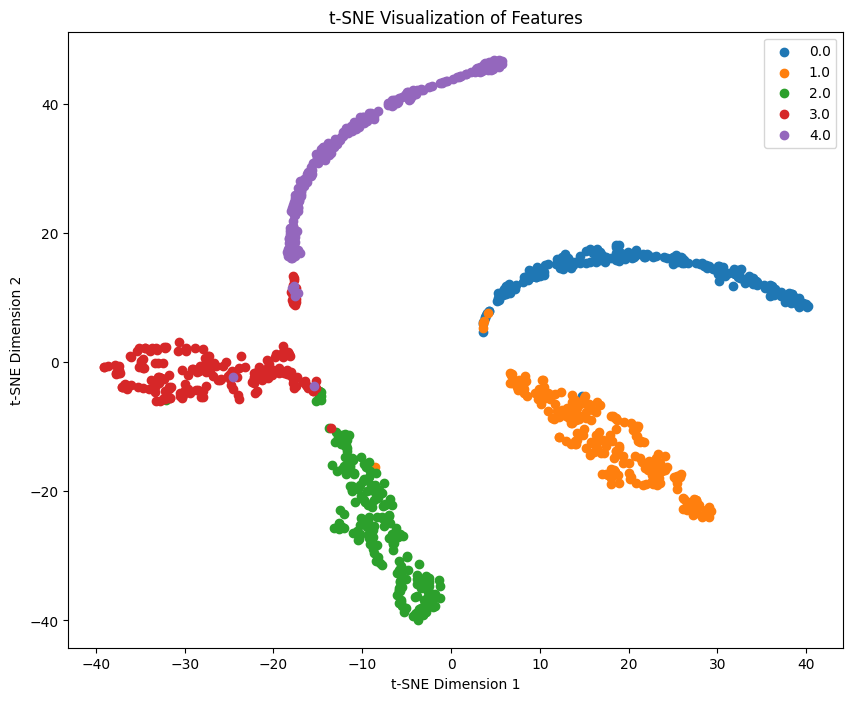

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE



# Assuming loader_te and yt are properly defined
# Get embeddings from the penultimate layer
penultimate_layer_model =tf.keras.models.Model(
                            inputs=model.inputs,
                            outputs=model.get_layer(name='dense_4').output,
                          )
embeddings = penultimate_layer_model.predict(loader_te.load(), steps=loader_te.steps_per_epoch)

# Apply t-SNE to reduce the dimensionality of the features to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(embeddings)

# Visualize the embedded features
plt.figure(figsize=(10, 8))
for label in np.unique(yt):
    indices = np.where(yt == label)
    plt.scatter(embedded_features[indices, 0], embedded_features[indices, 1], label=label)
plt.title('t-SNE Visualization of Features')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

In [23]:
print("Testing model")
loss, acc = model.evaluate(loader_te.load(), steps=loader_te.steps_per_epoch)
print("Done. Test loss: {}. Test acc: {}".format(loss, acc))

Testing model
1/1 [==============================] - 1s 777ms/step - loss: 1.0270 - accuracy: 0.9710
Done. Test loss: 1.0270158052444458. Test acc: 0.9710000157356262


In [38]:
#model.save('./TFGCNTRAN',save_format='tf')
np.save('TFGCNTRAN.npy',history.history)
#history=np.load('post_PE_500.npy',allow_pickle='TRUE').item()


TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/saving/legacy/saving_utils.py", line 147, in _wrapped_model  *
        outputs = model(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/saving/legacy/saved_model/save_impl.py", line 698, in call_and_return_conditional_losses
        call_output = layer_call(*args, **kwargs)

    TypeError: Exception encountered when calling layer 'gcn_conv_6' (type GCNConv).
    
    GCNConv.call() takes 1 positional argument but 2 were given
    
    Call arguments received by layer 'gcn_conv_6' (type GCNConv):
      • args=(['tf.Tensor(shape=(None, 64, 100), dtype=float32)', 'tf.Tensor(shape=(None, 64, 64), dtype=float32)'],)
      • kwargs=<class 'inspect._empty'>


In [6]:
history=np.load('TFGCNTRAN.npy',allow_pickle='TRUE').item()


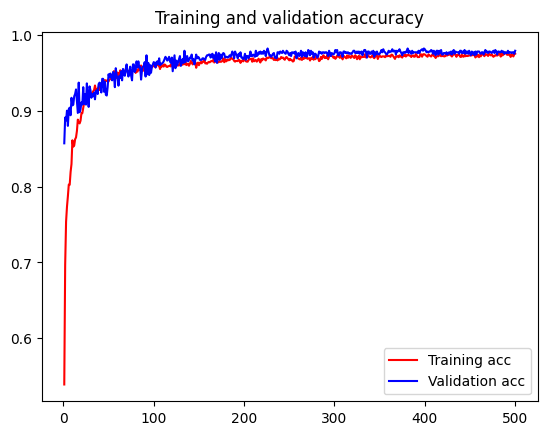

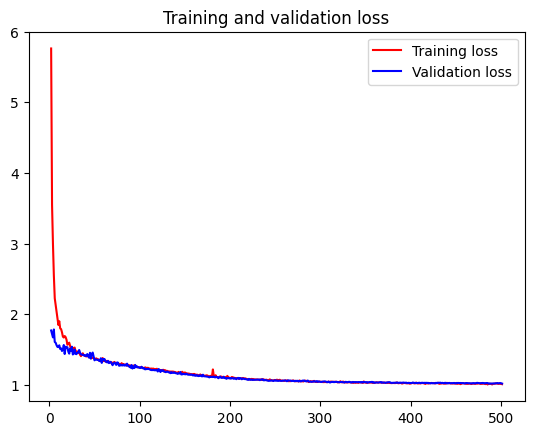

In [11]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
#loss = history.history['loss']
#val_loss = history.history['val_loss']
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)
plt.plot(epochs[0:500], acc[0:500], 'r', label='Training acc')
plt.plot(epochs[0:500], val_acc[0:500], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


plt.plot(epochs[1:501], loss[1:501], 'r', label='Training loss')
plt.plot(epochs[1:501], val_loss[1:501], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

کد ۱: min max

In [26]:
print(np.max(acc[0:500]))
print(np.max(val_acc[0:500]))

0.9768750071525574
0.9819999933242798


In [27]:
predictions = model.predict(loader_te.load(), steps=loader_te.steps_per_epoch)
ynew= np.argmax(predictions, axis=1)
print(ynew)
print(yt)


1/1 [==============================] - 1s 899ms/step
[0 1 1 0 1 3 4 1 2 1 3 4 2 1 3 1 2 4 0 4 0 3 1 2 4 1 2 0 1 0 0 4 1 2 3 0 2
 4 0 1 3 4 1 1 2 3 2 1 1 2 0 2 4 1 2 0 4 3 1 3 1 3 3 0 2 0 4 1 3 2 1 2 3 2
 0 2 0 1 2 2 1 3 3 0 3 1 3 4 1 0 1 4 1 0 1 2 2 3 3 1 3 2 0 3 1 3 1 3 0 1 3
 0 1 3 2 0 4 3 1 4 0 0 4 0 4 1 3 4 3 3 4 0 0 0 3 3 3 0 2 4 3 4 4 3 3 2 1 3
 2 0 2 4 4 3 3 2 3 4 4 0 0 0 2 2 1 2 4 1 0 1 3 4 0 4 3 2 0 1 3 2 2 3 4 1 0
 4 4 4 4 4 0 3 1 1 3 2 1 1 3 3 1 2 4 4 0 1 2 1 0 3 2 0 0 2 1 1 1 2 0 4 1 4
 1 3 3 2 4 3 1 0 3 3 2 3 4 3 4 2 1 2 4 3 2 4 3 3 4 2 1 4 4 2 3 1 3 1 2 4 3
 2 0 1 4 3 3 4 0 2 4 3 4 0 1 2 3 4 3 1 0 0 4 0 3 4 1 0 0 4 1 4 3 1 4 3 4 2
 3 0 3 4 1 3 4 0 1 4 1 4 3 0 0 4 2 1 1 0 1 3 3 0 2 4 3 0 0 0 1 4 0 4 1 4 1
 3 4 3 4 2 0 4 2 2 0 3 0 1 1 3 3 0 4 4 0 4 3 3 2 1 4 3 4 1 3 0 0 1 0 4 2 0
 3 4 3 2 0 3 1 2 0 0 0 4 4 3 0 3 0 0 2 1 0 2 2 2 0 3 4 1 4 1 1 2 1 4 4 3 4
 2 2 4 3 3 2 0 2 3 1 1 1 2 3 0 3 3 0 4 4 4 4 3 1 3 4 2 2 1 0 4 4 1 1 1 4 1
 0 2 1 1 1 1 4 1 1 4 4 2 0 3 1 2 4 4 4 0 4 3 1 

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import label_binarize
Y_testf= label_binarize(yt, classes=[0, 1, 2, 3, 4])
ynewf= label_binarize(ynew, classes=[0, 1, 2, 3, 4])
print('F1 Score: %.3f' % f1_score(Y_testf,ynewf ,average='macro'))
print('precision score: %.3f' % precision_score(Y_testf,ynewf ,average='macro'))
print('sensitivity: %.3f' % recall_score(Y_testf,ynewf ,average='macro'))
print('Specificity : %.3f' % recall_score(np.logical_not(Y_testf) , np.logical_not(ynewf) ,average='macro'))


F1 Score: 0.971
precision score: 0.971
sensitivity: 0.971
Specificity : 0.993


In [30]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(yt, ynew)
ـ, Specificity , ـ, ـ = score(np.logical_not(Y_testf) , np.logical_not(ynewf))

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('Specificity: {}'.format(Specificity))

precision: [0.99481865 0.97674419 0.99473684 0.92647059 0.96464646]
recall: [0.97461929 0.99056604 0.94974874 0.96428571 0.9744898 ]
fscore: [0.98461538 0.98360656 0.97172237 0.945      0.96954315]
Specificity: [0.99875467 0.99365482 0.99875156 0.98134328 0.99129353]


[[192   5   0   0   0]
 [  1 210   1   0   0]
 [  0   0 189  10   0]
 [  0   0   0 189   7]
 [  0   0   0   5 191]]


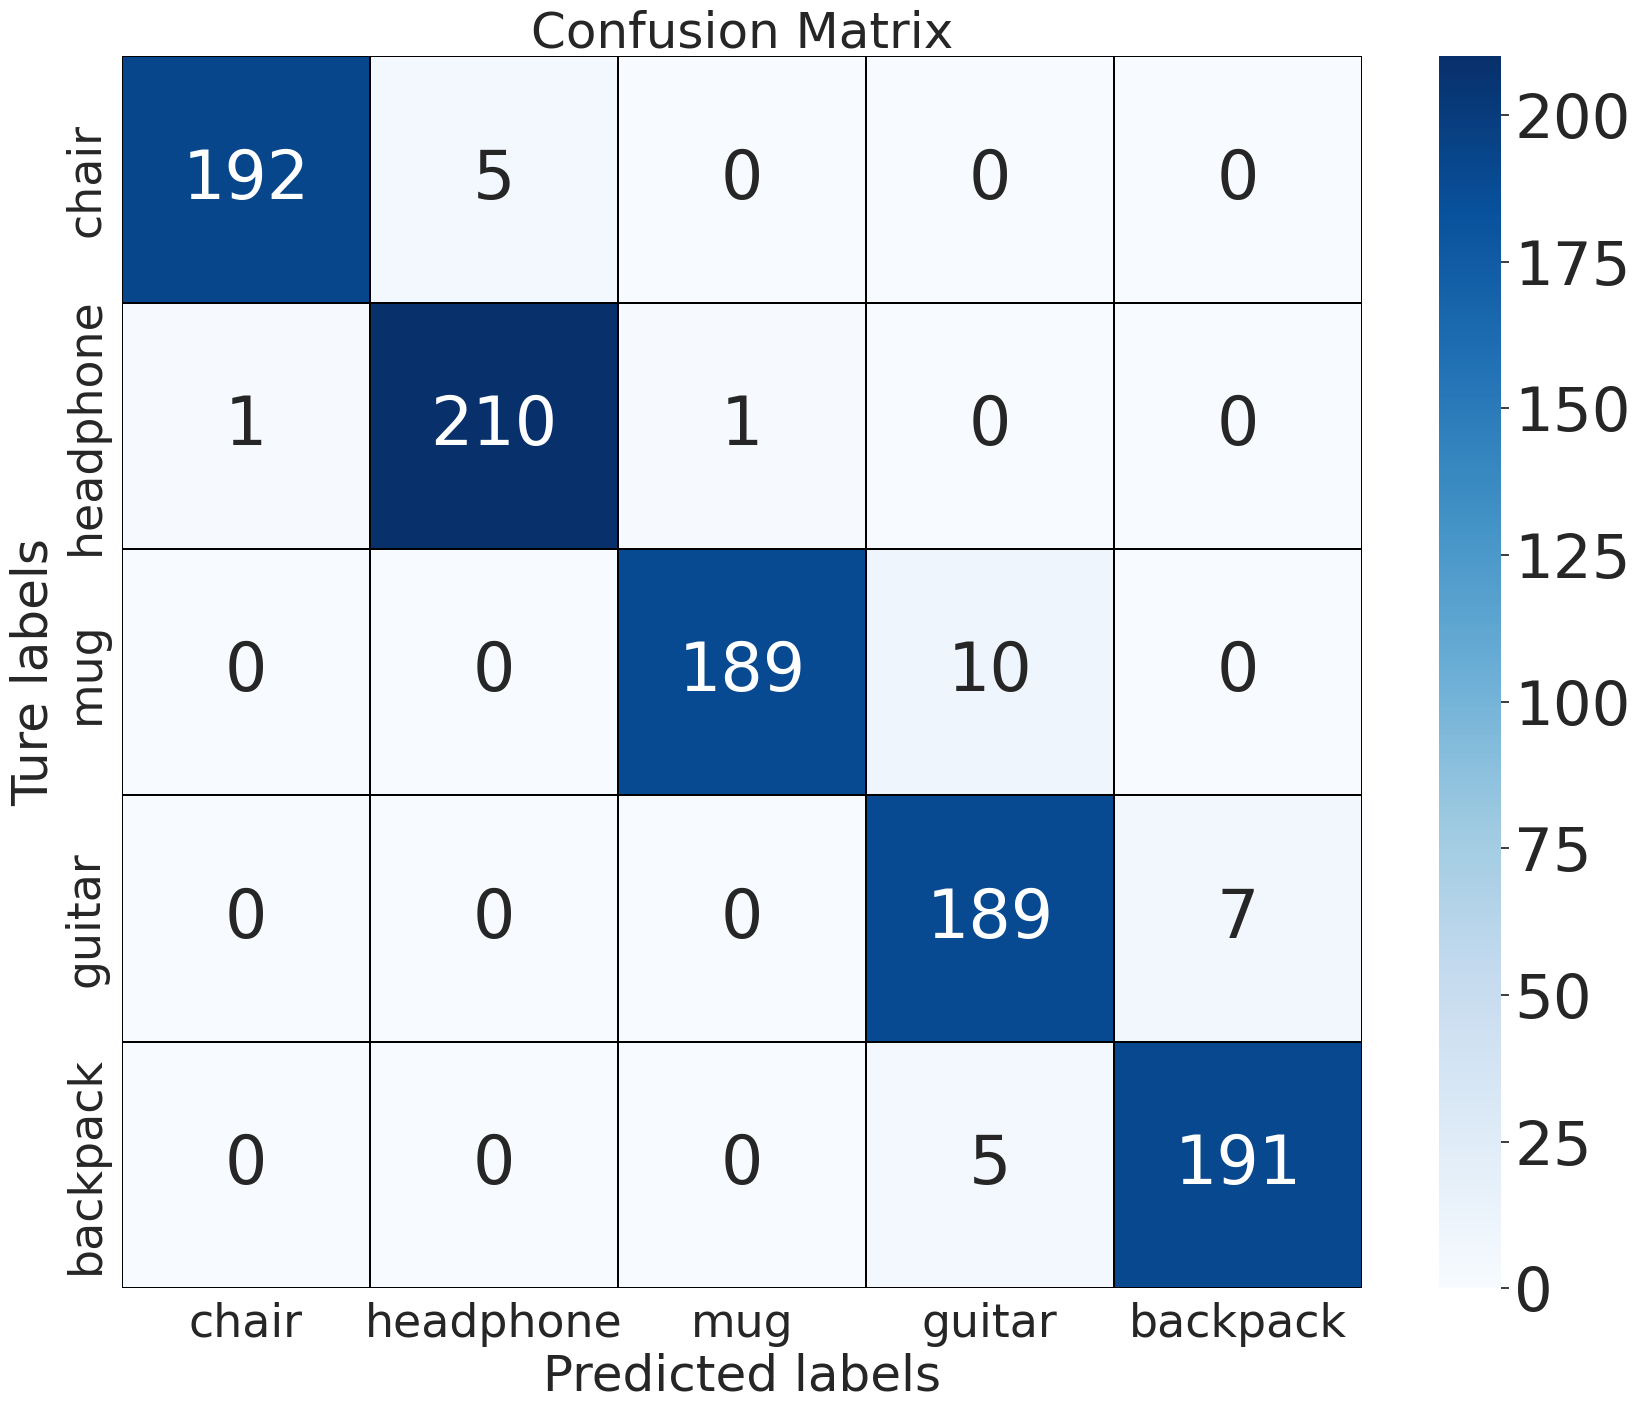

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
cm=confusion_matrix(yt,ynew)
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in "ABCDE"],
                  columns = [i for i in "ABCDE"])

fig, ax = plt.subplots(figsize=(20,16))
sn.set(font_scale=4.0)
sn.heatmap(df_cm,cmap='Blues', annot=True, fmt="d", linewidths=0.3, linecolor="black" )
sn.set(font_scale=3.0)
ax.set_ylabel('Ture labels');
ax.set_xlabel('Predicted labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['chair', 'headphone', 'mug', 'guitar', 'backpack' ]);
ax.yaxis.set_ticklabels(['chair', 'headphone', 'mug', 'guitar', 'backpack' ]);

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score


In [34]:
n_classes=5
y_test= label_binarize(yt, classes=[0, 1, 2, 3, 4])
ynew2= label_binarize(ynew, classes=[0, 1, 2, 3, 4])

In [35]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], ynew2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


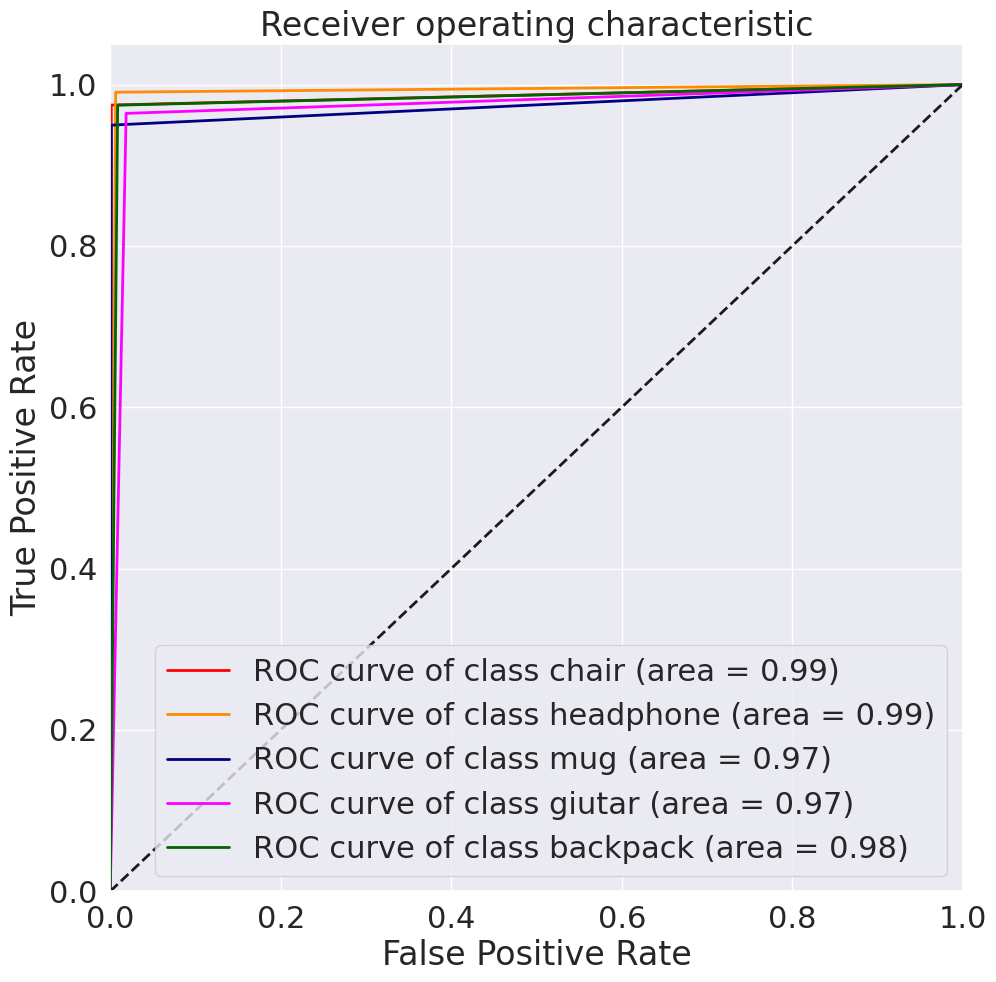

In [41]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig, ax = plt.subplots(figsize=(11,11))
#plt.figure()
sn.set(font_scale=2)
cs =['chair', 'headphone', 'mug', 'guitar', 'backpack' ]
colors = cycle(["red", "darkorange", "navy", "magenta", "darkgreen"])
lw = 2
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(cs[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
sn.set(font_scale=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()